In [1]:
from model import *
from data import *

Using TensorFlow backend.


## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data3d/train','frames','masks',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet1d.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=200,epochs=1,callbacks=[model_checkpoint])

/home/asli/Desktop/unet_mice_segmentation/unet_3channel/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/1
Found 48 images belonging to 1 classes.
Found 48 images belonging to 1 classes.
200/200 [==============================] - 1739s 9s/step - loss: 0.0313 - accuracy: 0.9965

Epoch 00001: loss improved from inf to 0.03128, saving model to unet1d.hdf5


### Train with npy file

In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [8]:
testGene = testGenerator("data3d/test")
model = unet()
model.load_weights("unet1d.hdf5")
results = model.predict_generator(testGene,10,verbose=1)
saveResult("data/test",results)

ValueError: Error when checking input: expected input_7 to have 4 dimensions, but got array with shape (1, 256, 256)

In [7]:
set(results[0].ravel())

{0.49501356, 0.49547693}

In [13]:
import matplotlib.pyplot as plt
import collections

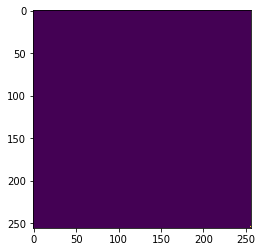

In [12]:
plt.imshow(results[0][:,:,0])

In [10]:
results[0].shape

(256, 256, 1)

In [15]:
for image in results:
    print(collections.Counter(image.ravel()))

Counter({0.49501356: 65535, 0.49547693: 1})
Counter({0.49501356: 65535, 0.49547073: 1})
Counter({0.49501356: 65535, 0.49549824: 1})
Counter({0.49501356: 65535, 0.49547473: 1})
Counter({0.49501356: 65535, 0.49553752: 1})
Counter({0.49501356: 65535, 0.49546537: 1})
Counter({0.49501356: 65535, 0.49551222: 1})
Counter({0.49501356: 65535, 0.49549204: 1})
Counter({0.49501356: 65535, 0.4955353: 1})
Counter({0.49501356: 65535, 0.49547252: 1})
